In [1]:
import os
import torch
import numpy as np
import matplotlib.pyplot as plt

from torchvision import transforms
from tester import Landmark_Tester
from utils import get_all_landmark_loaders, get_config, get_model_list
from PIL import Image

In [2]:
config = 'configs/mafl_test.yaml'
config = get_config(config)
train_loader, test_loader = get_all_landmark_loaders(config)

/home/junhahyung/imagetranslation/utils.py:112: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  return yaml.load(stream)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


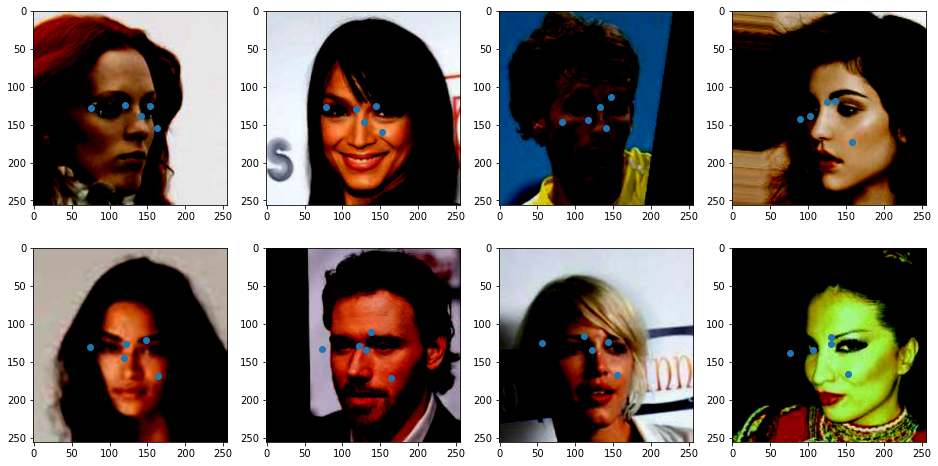

In [4]:
# before training

lt = Landmark_Tester(config)
lt.cuda()
bs = config['batch_size']

for i, (img, lm) in enumerate(test_loader):
    img, lm = img.cuda(), lm.cuda()
    lms = lt.infer(img)
    lms = lms.view(-1,5,2)
    lms = (lms + 1)/2 * 256
    
    
    cols = 4
    rows = 2
    fig, axs = plt.subplots(rows, cols, figsize=(4 * cols, 4 * rows))
    axs = np.ravel(axs)
    for i in range(bs):
        
        axs[i].imshow(np.array(img[i].permute(1,2,0).cpu()))
        axs[i].scatter(lms[i][:,0].cpu(), lms[i][:,1].cpu())
    
    break

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


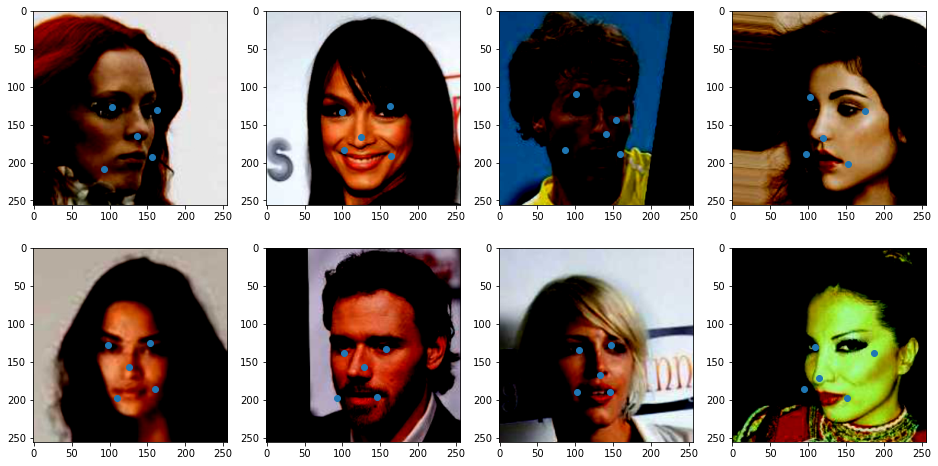

In [7]:
# after training
lt.load("outputs/mafl_test/checkpoints")

lms = lt.infer(img)
lms = lms.view(-1,5,2)
lms = (lms + 1)/2 * 256


cols = 4
rows = 2
fig, axs = plt.subplots(rows, cols, figsize=(4 * cols, 4 * rows))
axs = np.ravel(axs)
for i in range(bs):

    axs[i].imshow(np.array(img[i].permute(1,2,0).cpu()))
    axs[i].scatter(lms[i][:,0].cpu(), lms[i][:,1].cpu())